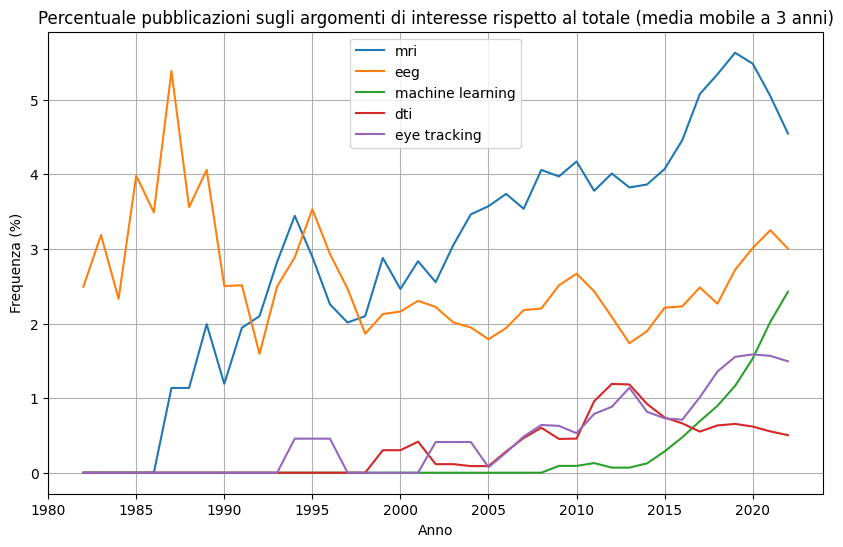

C:\Users\Claudio\AppData\Local\Temp\ipykernel_26164\2249636283.py:71: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  counts[term] = df['Abstract'].str.contains(pattern, case=False, na=False).groupby(df['Anno']).sum()


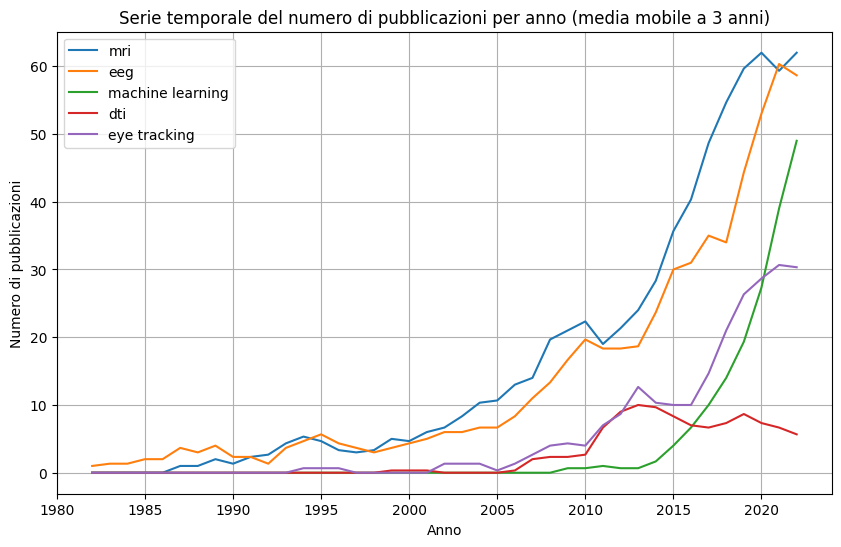

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] >= 1980]
# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] < 2023]

search_terms = ['mri', 'eeg', 'machine learning', 'dti']

sorted_years = np.sort(df['Anno'].unique())

# Create a dictionary to store the search term frequencies
search_term_freq = {term : [0]*len(sorted_years) for term in search_terms}

# Create a special case for 'eye path' and 'eye tracking'
search_term_freq['eye tracking'] = [0]*len(sorted_years)

# Get the total number of abstracts per year
total_abstracts_per_year = df['Anno'].value_counts().sort_index()

for year in df['Anno'].unique():
    year_df = df[df['Anno'] == year]
    
    term_count = year_df['Abstract'].apply(lambda x: any(term in x.lower() for term in ['eye-tracking', 'eye tracking', 'eye-tracking'])).sum()
    search_term_freq['eye tracking'][np.where(sorted_years==year)[0][0]] = (term_count / total_abstracts_per_year[year]) * 100
    
    for term in search_terms:
        term_count = year_df['Abstract'].str.contains(term, case=False).sum()
        search_term_freq[term][np.where(sorted_years==year)[0][0]] = (term_count / total_abstracts_per_year[year]) * 100

# Plotting
plt.figure(figsize=(10,6))

for term, freq in search_term_freq.items():
    # Convert the frequency to a pandas Series
    freq_series = pd.Series(freq, index=sorted_years)
    
    # Calculate the 2-year moving average
    moving_avg = freq_series.rolling(window=3).mean()
    
    plt.plot(sorted_years, moving_avg, label=term)

plt.xlabel('Anno')
plt.ylabel('Frequenza (%)')
plt.title('Percentuale pubblicazioni sugli argomenti di interesse rispetto al totale (media mobile a 3 anni)')
plt.xticks(range(1980, 2021, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)
plt.show()

# For the second plot
# Initialize an empty dictionary to store the counts
counts = {}

# Count the occurrences per year for each search term
for term in search_terms:
    pattern = r'\b(' + re.escape(term) + r')\b'
    counts[term] = df['Abstract'].str.contains(pattern, case=False, na=False).groupby(df['Anno']).sum()

# Add the 'eye tracking' counts that includes 'eye-tracking', 'eye tracking', and 'scanpath'
counts['eye tracking'] = df['Abstract'].apply(lambda x: any(term in x.lower() for term in ['eye-tracking', 'eye tracking', 'scanpath'])).groupby(df['Anno']).sum()

# Create a DataFrame from the counts
counts_df = pd.DataFrame(counts)

# Convert counts to Series and calculate 5-year moving averages
counts_df = counts_df.rolling(window=3).mean()

# Plot the data
counts_df.plot.line(figsize=(10, 6))

# Customize the plot
plt.xlabel('Anno')
plt.ylabel('Numero di pubblicazioni')
plt.title('Serie temporale del numero di pubblicazioni per anno (media mobile a 3 anni)')

plt.xticks(range(1980, 2023, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)  # Add grid
plt.show()


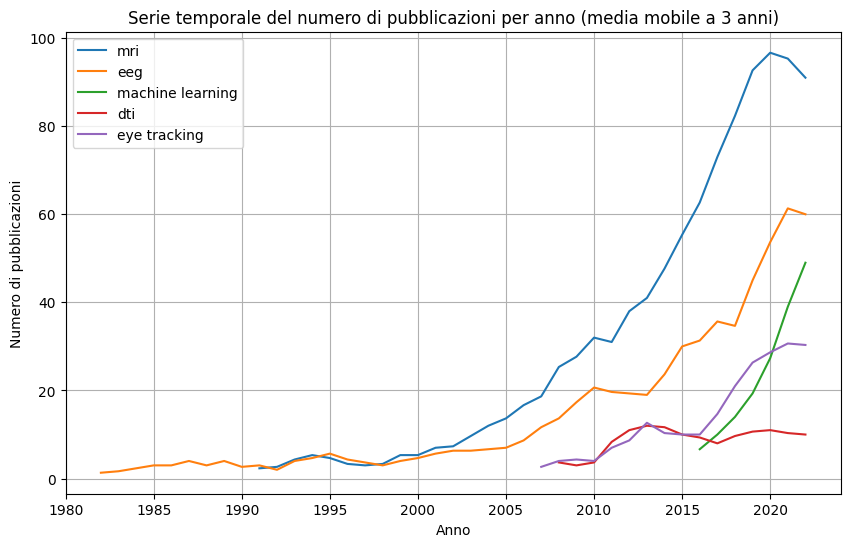

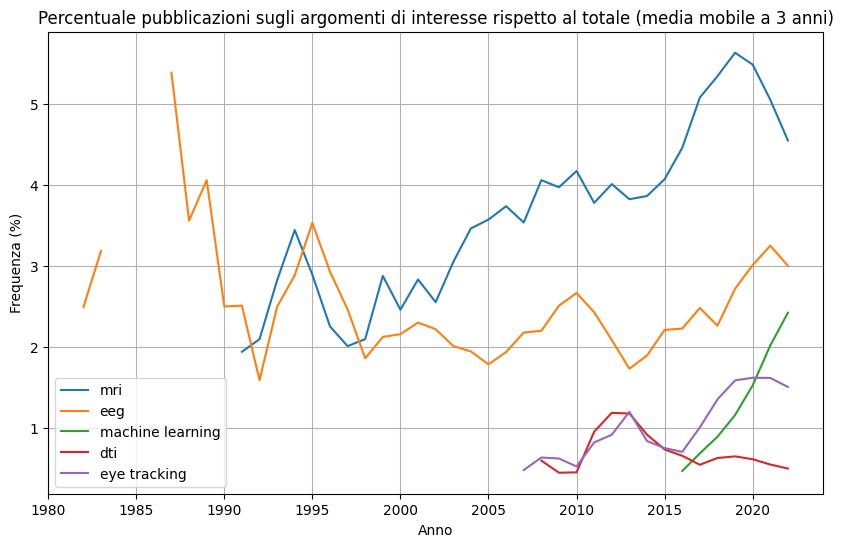

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to only include years from 1980 onwards
df = df[(df['Anno'] >= 1980) & (df['Anno'] < 2023)]

search_terms = ['mri', 'eeg', 'machine learning', 'dti']

sorted_years = np.sort(df['Anno'].unique())

# Create a dictionary to store the search term frequencies
search_term_freq = {term : [0]*len(sorted_years) for term in search_terms}

# Get the total number of abstracts per year
total_abstracts_per_year = df['Anno'].value_counts().sort_index()

for term in search_terms:
    counts_term = df[df['Abstract'].str.contains(term, case=False)]['Anno'].value_counts().sort_index()
    search_term_freq[term] = (counts_term / total_abstracts_per_year) * 100

# Add the 'eye tracking' counts that includes 'eye-tracking', 'eye tracking', and 'scanpath'
counts_eye_tracking = df[df['Abstract'].apply(lambda x: any(term in x.lower() for term in ['eye-tracking', 'eye tracking', 'scanpath']))]['Anno'].value_counts().sort_index()
search_term_freq['eye tracking'] = (counts_eye_tracking / total_abstracts_per_year) * 100

# For the first plot
# Initialize an empty dictionary to store the counts
counts = {term : [0]*len(sorted_years) for term in search_terms}

# Count the occurrences per year for each search term
for term in search_terms:
    counts[term] = df[df['Abstract'].str.contains(term, case=False)]['Anno'].value_counts().sort_index()

counts['eye tracking'] = counts_eye_tracking

# Create a DataFrame from the counts
counts_df = pd.DataFrame(counts)

# Convert counts to Series and calculate 5-year moving averages
counts_df = counts_df.rolling(window=3).mean()

# Plot the data
counts_df.plot.line(figsize=(10, 6))

# Customize the plot
plt.xlabel('Anno')
plt.ylabel('Numero di pubblicazioni')
plt.title('Serie temporale del numero di pubblicazioni per anno (media mobile a 3 anni)')
plt.xticks(range(1980, 2023, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)  # Add grid
plt.show()

# For the second plot
# Plotting
plt.figure(figsize=(10,6))

for term, freq in search_term_freq.items():
    # Convert the frequency to a pandas Series
    freq_series = pd.Series(freq, index=sorted_years)
    
    # Calculate the 2-year moving average
    moving_avg = freq_series.rolling(window=3).mean()
    
    plt.plot(sorted_years, moving_avg, label=term)

plt.xlabel('Anno')
plt.ylabel('Frequenza (%)')
plt.title('Percentuale pubblicazioni sugli argomenti di interesse rispetto al totale (media mobile a 3 anni)')
plt.xticks(range(1980, 2023, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)
plt.show()


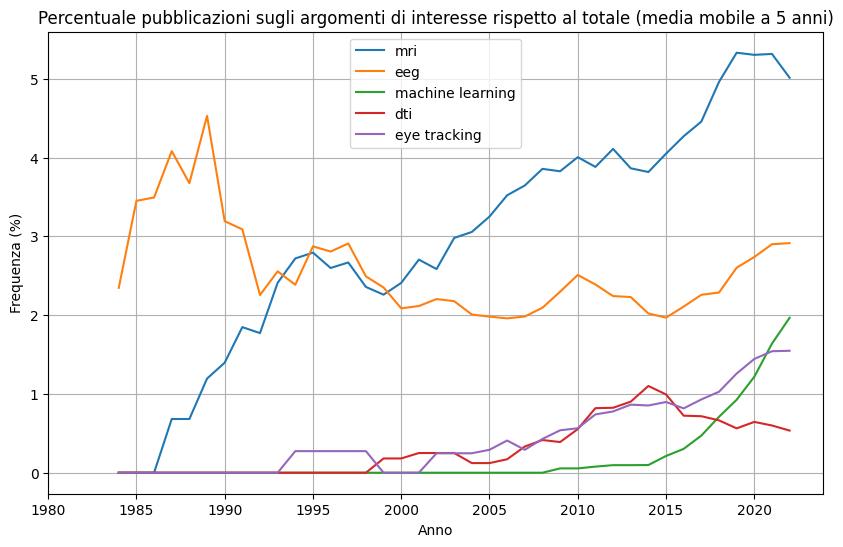

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] >= 1980]
# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] < 2023]

search_terms = ['mri', 'eeg', 'machine learning', 'dti']

sorted_years = np.sort(df['Anno'].unique())

# Create a dictionary to store the search term frequencies
search_term_freq = {term : [0]*len(sorted_years) for term in search_terms}

# Create a special case for 'eye path' and 'eye tracking'
search_term_freq['eye tracking'] = [0]*len(sorted_years)

# Get the total number of abstracts per year
total_abstracts_per_year = df['Anno'].value_counts().sort_index()

for year in df['Anno'].unique():
    year_df = df[df['Anno'] == year]
    
    term_count = year_df['Abstract'].apply(lambda x: any(term in x.lower() for term in ['eye-tracking', 'eye tracking', 'eye-tracking'])).sum()
    search_term_freq['eye tracking'][np.where(sorted_years==year)[0][0]] = (term_count / total_abstracts_per_year[year]) * 100
    
    for term in search_terms:
        term_count = year_df['Abstract'].str.contains(term, case=False).sum()
        search_term_freq[term][np.where(sorted_years==year)[0][0]] = (term_count / total_abstracts_per_year[year]) * 100

# Plotting
plt.figure(figsize=(10,6))

for term, freq in search_term_freq.items():
    # Convert the frequency to a pandas Series
    freq_series = pd.Series(freq, index=sorted_years)
    
    # Calculate the 2-year moving average
    moving_avg = freq_series.rolling(window=5).mean()
    
    plt.plot(sorted_years, moving_avg, label=term)

plt.xlabel('Anno')
plt.ylabel('Frequenza (%)')
plt.title('Percentuale pubblicazioni sugli argomenti di interesse rispetto al totale (media mobile a 5 anni)')
plt.xticks(range(1980, 2021, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] >= 1980]
# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] < 2023]


search_terms = ['mri', 'eeg', 'machine learning', 'dti']

sorted_years = np.sort(df['Anno'].unique())


# Create a dictionary to store the search term frequencies
#search_term_freq = {term : [0]*len(sorted_years) for term in search_terms}

counts = {}

# Count the occurrences per year for each search term
for term in search_terms:
    pattern = r'\b(' + re.escape(term) + r')\b'
    counts[term] = df['Abstract'].str.contains(pattern, case=False, na=False).groupby(df['Anno']).sum()

# Add the 'eye tracking' counts that includes 'eye-tracking', 'eye tracking', and 'scanpath'
counts['eye tracking'] = df['Abstract'].apply(lambda x: any(term in x.lower() for term in ['eye-tracking', 'eye tracking', 'scanpath'])).groupby(df['Anno']).sum()


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] >= 1980]
# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] < 2023]


search_terms = ['mri', 'eeg', 'machine learning', 'dti']

sorted_years = np.sort(df['Anno'].unique())


# Create a dictionary to store the search term frequencies
#search_term_freq = {term : [0]*len(sorted_years) for term in search_terms}

counts = {}

# Count the occurrences per year for each search term
for term in search_terms:
    pattern = r'\b(' + re.escape(term) + r')\b'
    counts[term] = df['Abstract'].str.contains(pattern, case=False, na=False).groupby(df['Anno']).sum()

# Add the 'eye tracking' counts that includes 'eye-tracking', 'eye tracking', and 'scanpath'
counts['eye tracking'] = df['Abstract'].apply(lambda x: any(term in x.lower() for term in ['eye-tracking', 'eye tracking', 'scanpath'])).groupby(df['Anno']).sum()

# Create a DataFrame from the counts
counts_df = pd.DataFrame(counts)

# Convert counts to Series and calculate 5-year moving averages
counts_df = counts_df.rolling(window=1).mean()

# Plot the data
counts_df.plot.line(figsize=(10, 6))

# Customize the plot
plt.xlabel('Anno')
plt.ylabel('Numero di pubblicazioni')
plt.title('Serie temporale del numero di pubblicazioni per anno')

plt.xticks(range(1980, 2023, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)  # Add grid
plt.show()


# Create a DataFrame from the counts
counts_df = pd.DataFrame(counts)

# Convert counts to Series and calculate 5-year moving averages
counts_df = counts_df.rolling(window=1).mean()

# Plot the data
counts_df.plot.line(figsize=(10, 6))

# Customize the plot
plt.xlabel('Anno')
plt.ylabel('Numero di pubblicazioni')
plt.title('Serie temporale del numero di pubblicazioni per anno')

plt.xticks(range(1980, 2023, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)  # Add grid
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] >= 1980]
# Filter the dataframe to only include years from 1980 onwards
df = df[df['Anno'] < 2023]


search_terms = ['mri', 'eeg', 'machine learning', 'dti']

sorted_years = np.sort(df['Anno'].unique())


# Create a dictionary to store the search term frequencies
#search_term_freq = {term : [0]*len(sorted_years) for term in search_terms}

counts = {}

# Count the occurrences per year for each search term
for term in search_terms:
    pattern = r'\b(' + re.escape(term) + r')\b'
    counts[term] = df['Abstract'].str.contains(pattern, case=False, na=False).groupby(df['Anno']).sum()

# Add the 'eye tracking' counts that includes 'eye-tracking', 'eye tracking', and 'scanpath'
counts['eye tracking'] = df['Abstract'].apply(lambda x: any(term in x.lower() for term in ['eye-tracking', 'eye tracking', 'scanpath'])).groupby(df['Anno']).sum()

# Create a DataFrame from the counts
counts_df = pd.DataFrame(counts)

# Convert counts to Series and calculate 5-year moving averages
counts_df = counts_df.rolling(window=1).mean()

# Plot the data
counts_df.plot.line(figsize=(10, 6))

# Customize the plot
plt.xlabel('Anno')
plt.ylabel('Numero di pubblicazioni')
plt.title('Serie temporale del numero di pubblicazioni per anno')

plt.xticks(range(1980, 2023, 5))  # Set x-ticks every 5 years
plt.legend()
plt.grid(True)  # Add grid
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to only include rows where 'Anno' is before 2015
df_before_2015 = df[df['Anno'] >= 2015]

# Get the number of rows
num_rows = len(df_before_2015)

print(f"Il numero di righe prima del 2015 è {num_rows}.")


Il numero di righe prima del 2015 è 14978.


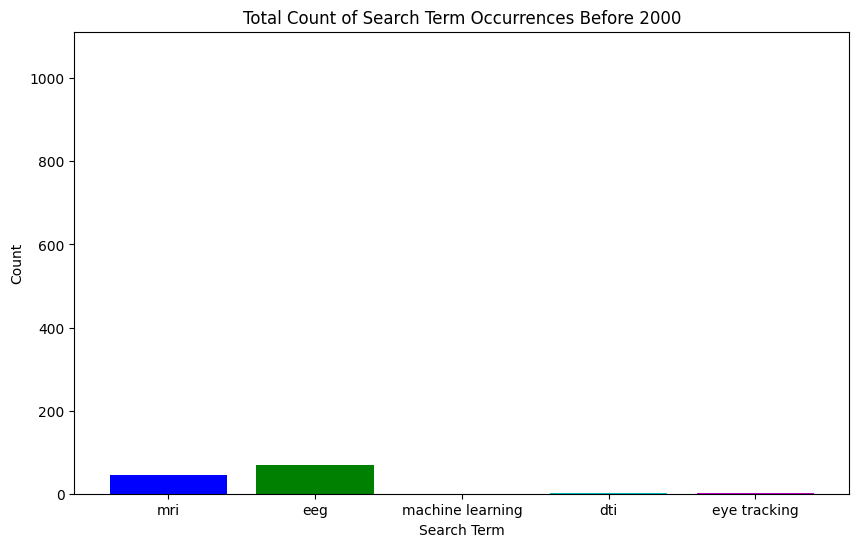

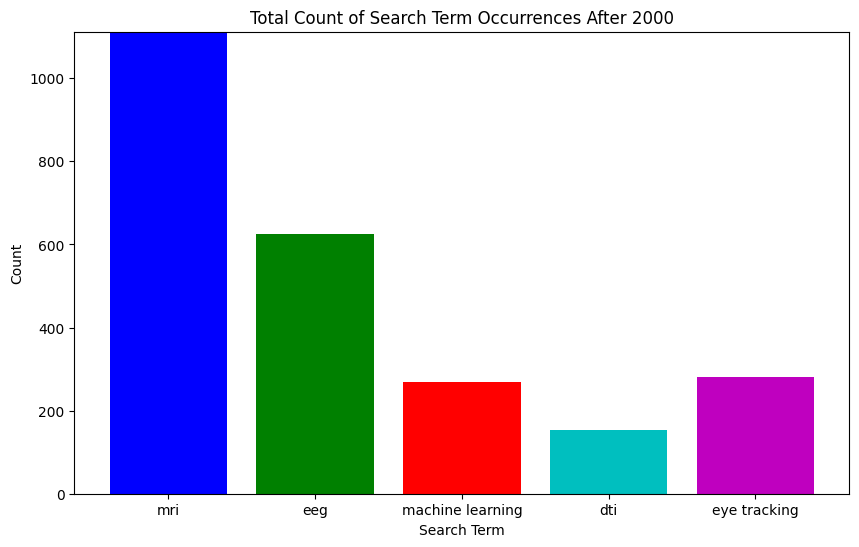

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to create two periods: before and after 2000
df_before_2000 = df[df['Anno'] < 2010]
df_after_2000 = df[df['Anno'] >= 2010]

search_terms = ['mri', 'eeg', 'machine learning', 'dti']

# Initialize an empty dictionary to store the counts
counts_before_2000 = {term : 0 for term in search_terms}
counts_before_2000['eye tracking'] = 0

counts_after_2000 = {term : 0 for term in search_terms}
counts_after_2000['eye tracking'] = 0

# Define a function to count occurrences
def count_occurrences(df, counts):
    for term in counts.keys():
        if term == 'eye tracking':
            counts[term] = df['Abstract'].apply(lambda x: any(t in x.lower() for t in ['eye-tracking', 'eye tracking', 'scanpath'])).sum()
        else:
            counts[term] = df['Abstract'].str.contains(term, case=False).sum()

# Count occurrences before and after 2000
count_occurrences(df_before_2000, counts_before_2000)
count_occurrences(df_after_2000, counts_after_2000)

# Plotting
plt.figure(figsize=(10,6))

plt.bar(counts_before_2000.keys(), counts_before_2000.values(), color=['b', 'g', 'r', 'c', 'm'])
plt.xlabel('Search Term')
plt.ylabel('Count')
plt.title('Total Count of Search Term Occurrences Before 2010')
plt.ylim([0, max(max(counts_before_2000.values()), max(counts_after_2000.values()))])  # Keep y-axis the same for both plots
plt.show()

plt.figure(figsize=(10,6))

plt.bar(counts_after_2000.keys(), counts_after_2000.values(), color=['b', 'g', 'r', 'c', 'm'])
plt.xlabel('Search Term')
plt.ylabel('Count')
plt.title('Total Count of Search Term Occurrences After 2010')
plt.ylim([0, max(max(counts_before_2000.values()), max(counts_after_2000.values()))])  # Keep y-axis the same for both plots
plt.show()


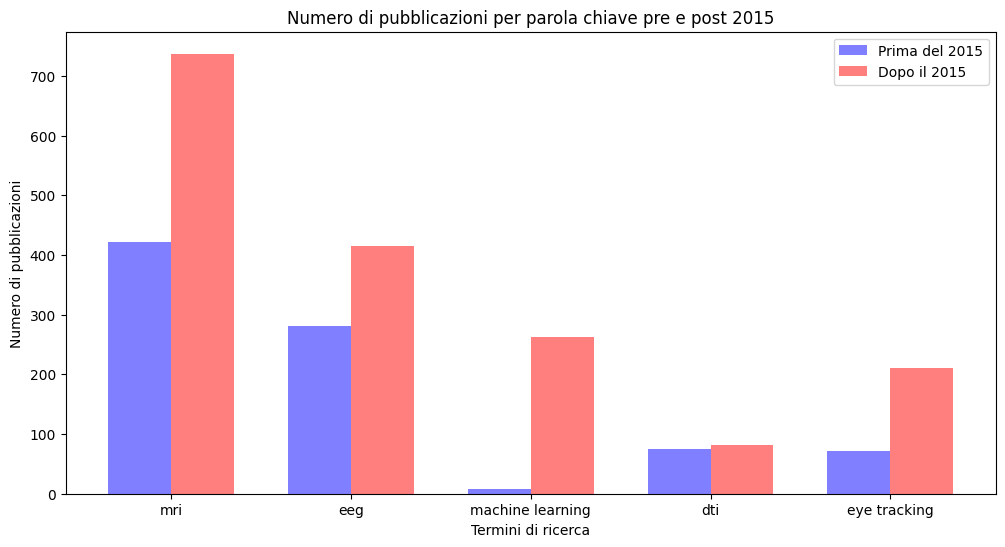

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the dataframe to create two periods: before and after 2000
df_before_2000 = df[df['Anno'] < 2015]
df_after_2000 = df[df['Anno'] >= 2015]

search_terms = ['mri', 'eeg', 'machine learning', 'dti']

# Initialize an empty dictionary to store the counts
counts_before_2000 = {term : 0 for term in search_terms}
counts_before_2000['eye tracking'] = 0

counts_after_2000 = {term : 0 for term in search_terms}
counts_after_2000['eye tracking'] = 0

# Define a function to count occurrences
def count_occurrences(df, counts):
    for term in counts.keys():
        if term == 'eye tracking':
            counts[term] = df['Abstract'].apply(lambda x: any(t in x.lower() for t in ['eye-tracking', 'eye tracking', 'scanpath'])).sum()
        else:
            counts[term] = df['Abstract'].str.contains(term, case=False).sum()

# Count occurrences before and after 2000
count_occurrences(df_before_2000, counts_before_2000)
count_occurrences(df_after_2000, counts_after_2000)

# Plotting
plt.figure(figsize=(12,6))

# Define the width of a bar and the locations of the bars
width = 0.35
ind = np.arange(len(counts_before_2000))

# Create the bars with softer colors (RGBA format)
bars1 = plt.bar(ind - width/2, counts_before_2000.values(), width, color=(0, 0, 1, 0.5), label='Prima del 2015')
bars2 = plt.bar(ind + width/2, counts_after_2000.values(), width, color=(1, 0, 0, 0.5), label='Dopo il 2015')

# Labeling
plt.xlabel('Termini di ricerca')
plt.ylabel('Numero di pubblicazioni')
plt.title('Numero di pubblicazioni per parola chiave pre e post 2015')
plt.xticks(ind, counts_before_2000.keys())  # Set the x-ticks to be the search terms
plt.legend()  # Add a legend

plt.show()


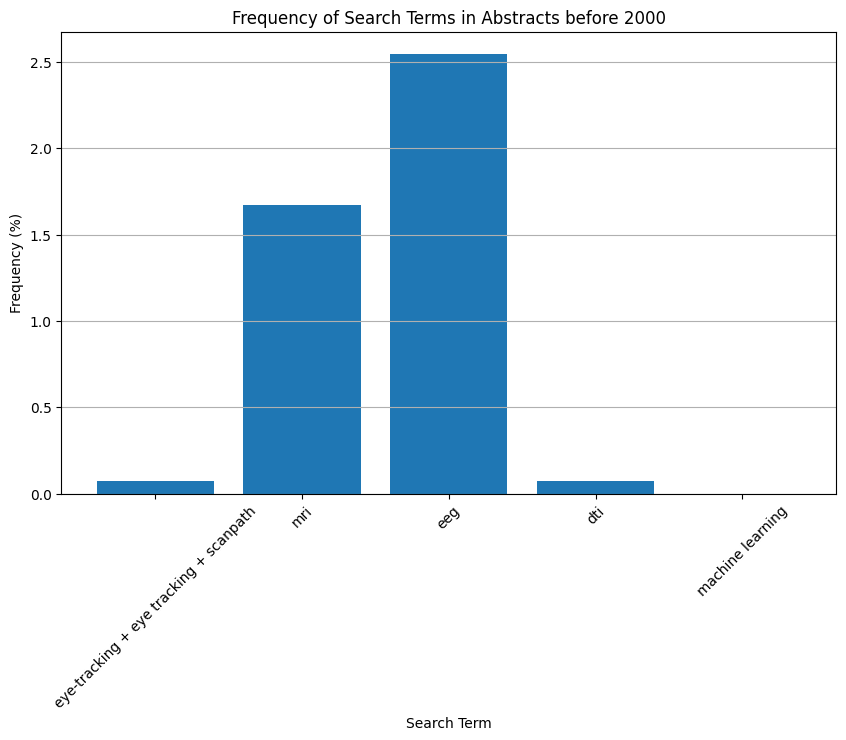

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pubmedgenerale.csv')

df['Anno'] = pd.to_numeric(df['Anno'], errors='coerce')

# Drop rows with NaN in 'Anno'
df = df.dropna(subset=['Anno'])

# Convert the year to integer
df['Anno'] = df['Anno'].astype(int)

# Filter the data for years from 2000 to the present
df = df[df['Anno'] < 2000]

search_terms = ['eye tracking', 'eye-tracking', 'scanpath', 'mri', 'eeg', 'dti', 
                'machine learning']

# Get the total number of abstracts
total_abstracts = len(df)

# Create a dictionary to store the search term frequencies
search_term_freq = {}

# For each term, get the count of abstracts that contain the term
for term in search_terms:
    if term in ['eye-tracking', 'eye tracking', 'scanpath']:
        term_count = df['Abstract'].str.contains('eye-tracking|eye tracking|scanpath', case=False).sum()
        search_term_freq['eye-tracking + eye tracking + scanpath'] = (term_count / total_abstracts) * 100
    else:
        term_count = df['Abstract'].str.contains(term, case=False).sum()
        search_term_freq[term] = (term_count / total_abstracts) * 100

# Plotting
plt.figure(figsize=(10,6))

plt.bar(search_term_freq.keys(), search_term_freq.values())

plt.xlabel('Search Term')
plt.xticks(rotation=45)
plt.ylabel('Frequency (%)')
plt.title('Frequency of Search Terms in Abstracts before 2000')
plt.grid(axis='y')
plt.show()


In [249]:
import nltk
nltk.download('wordnet')  # Questo scarica il corpus 'wordnet', che è richiesto dal WordNetLemmatizer

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


import re
import string
#pattern for URLs
re_url = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
#pattern for email
re_email = re.compile(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')
#for repetitions (more than 2 consecutive characters)
re_repetition = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)

def cleaning(text):


    #Transform to lower-case
    text = text.lower()
    #Remove urls
    text = re.sub(re_url, ' ', text)
    #Remove email addresses
    text = re.sub(re_email, ' ', text)
    #Remove square brackets
    text = re.sub('\[.*?\]', '', text)
    #Remove \n and \r
    text = text.replace('\\n', ' ').replace('\\r', ' ')
    #Remove digit
    text = re.sub(r'(\d+)', ' ', text)
    #Remove punctuation
    text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)
    #Remove emojis
    #text= remove_emoji(text)
    #Remove non ascii char
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    #Limiting all the  repetitions to two characters.
    text = re_repetition.sub(r"\1\1", text)
    #Remove single characters
    text= re.sub(r"\b[a-zA-Z]\b", '', text)
    #Remove newline, return, tab, form [ \n\r\t\f]
    text = re.sub(r'(\s+)', ' ', text)
    #Strip whitespaces at the beginning and at the end of text
    text = text.strip()


    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Claudio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [250]:
import nltk
nltk.download('punkt')  # This downloads the 'punkt' tokenizer, required by word_tokenize
nltk.download('wordnet')  # This downloads the 'wordnet' corpus, required by WordNetLemmatizer
nltk.download('stopwords') # This downloads the 'stopwords' corpus, required for the stopwords list

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Create the lemmatizer
lemmatizer = WordNetLemmatizer()

# Get the list of stopwords in English
stop_words = set(stopwords.words('english'))

# Add your custom words to the stopwords list
custom_words = ["children", "autism", "asd", "the", "study", "group", "spectrum", "age", "result"]
stop_words.update(custom_words)

# Apply lemmatization and remove stopwords
df_topic['text_no_stopwords'] = df_topic['Abstract'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(x) if w.isalpha() and w.lower() not in stop_words])
)

# Apply additional text cleaning operations
df_topic['text_cleaned'] = df_topic['text_no_stopwords'].apply(cleaning)

df_topic['text_cleaned']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Claudio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Claudio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Claudio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


48                                                        
63                                                        
74                                                        
121                                                       
137                                                       
                               ...                        
27780    pandemic associated significant increase sleep...
27781    purpose examine parent intellectual impairment...
27784    lifelong condition intervention must occur ear...
27796    background australian immigration policy resul...
27799    disorder complex neurological developmental di...
Name: text_cleaned, Length: 1766, dtype: object

In [253]:
from bertopic import BERTopic

# Filter the DataFrame to include only rows where the Abstract contains 'Machine Learning'
df_ml = df_topic[df_topic['text_cleaned'].str.contains('Machine Learning', case=False, na=False)]

# Create a list of documents from the cleaned text
documents_no_stopwords = df_ml['text_cleaned'].tolist()

# Create an instance of BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", nr_topics=10)

# Train the model on your documents without stopwords
topics, probabilities = topic_model.fit_transform(documents_no_stopwords)

# Visualize the topics
topic_model.visualize_topics()


In [254]:
# Ottenere le parole più rappresentative per il primo topic
topic_words = topic_model.get_topic(0)

print(topic_words)

[('eeg', 0.11668136334065102), ('sleep', 0.0716895181379793), ('feature', 0.04369079358486818), ('signal', 0.04213369446220407), ('machine', 0.031866232107307546), ('learning', 0.02973186547981986), ('system', 0.029633362118260575), ('model', 0.028548409451264814), ('disorder', 0.027582105745900823), ('effect', 0.02700894060770786)]


In [255]:
import pandas as pd

# Ottieni le informazioni sui topic
topic_info = topic_model.get_topic_info()

# Converti il DataFrame in un DataFrame di pandas
topic_info_pd = pd.DataFrame(topic_info)



In [256]:
for i in topic_info_pd['Topic'].unique():
    topic_words = topic_model.get_topic(i)
    print(f'Topic {i}:')
    for word, score in topic_words[:10]:
        print(f'- {word} ({score})')

Topic -1:
- model (0.03678820743753158)
- disorder (0.030845640482659278)
- machine (0.028818178094302427)
- learning (0.028636409503049874)
- data (0.026223066414196958)
- using (0.0238242968286862)
- clinical (0.021198527589229306)
- risk (0.02110724431841951)
- diagnostic (0.019678227238385457)
- diagnosis (0.019100675453221125)
Topic 0:
- eeg (0.11668136334065102)
- sleep (0.0716895181379793)
- feature (0.04369079358486818)
- signal (0.04213369446220407)
- machine (0.031866232107307546)
- learning (0.02973186547981986)
- system (0.029633362118260575)
- model (0.028548409451264814)
- disorder (0.027582105745900823)
- effect (0.02700894060770786)
Topic 1:
- movement (0.115505983297479)
- motor (0.05779347531430535)
- disorder (0.03390218502797651)
- feature (0.032619482017484845)
- accuracy (0.03258287518780971)
- machine (0.03229742075651162)
- pattern (0.032147110818143906)
- body (0.0320101791462497)
- sensor (0.030764272525372664)
- head (0.030764272525372664)
Topic 2:
- adhd (0.

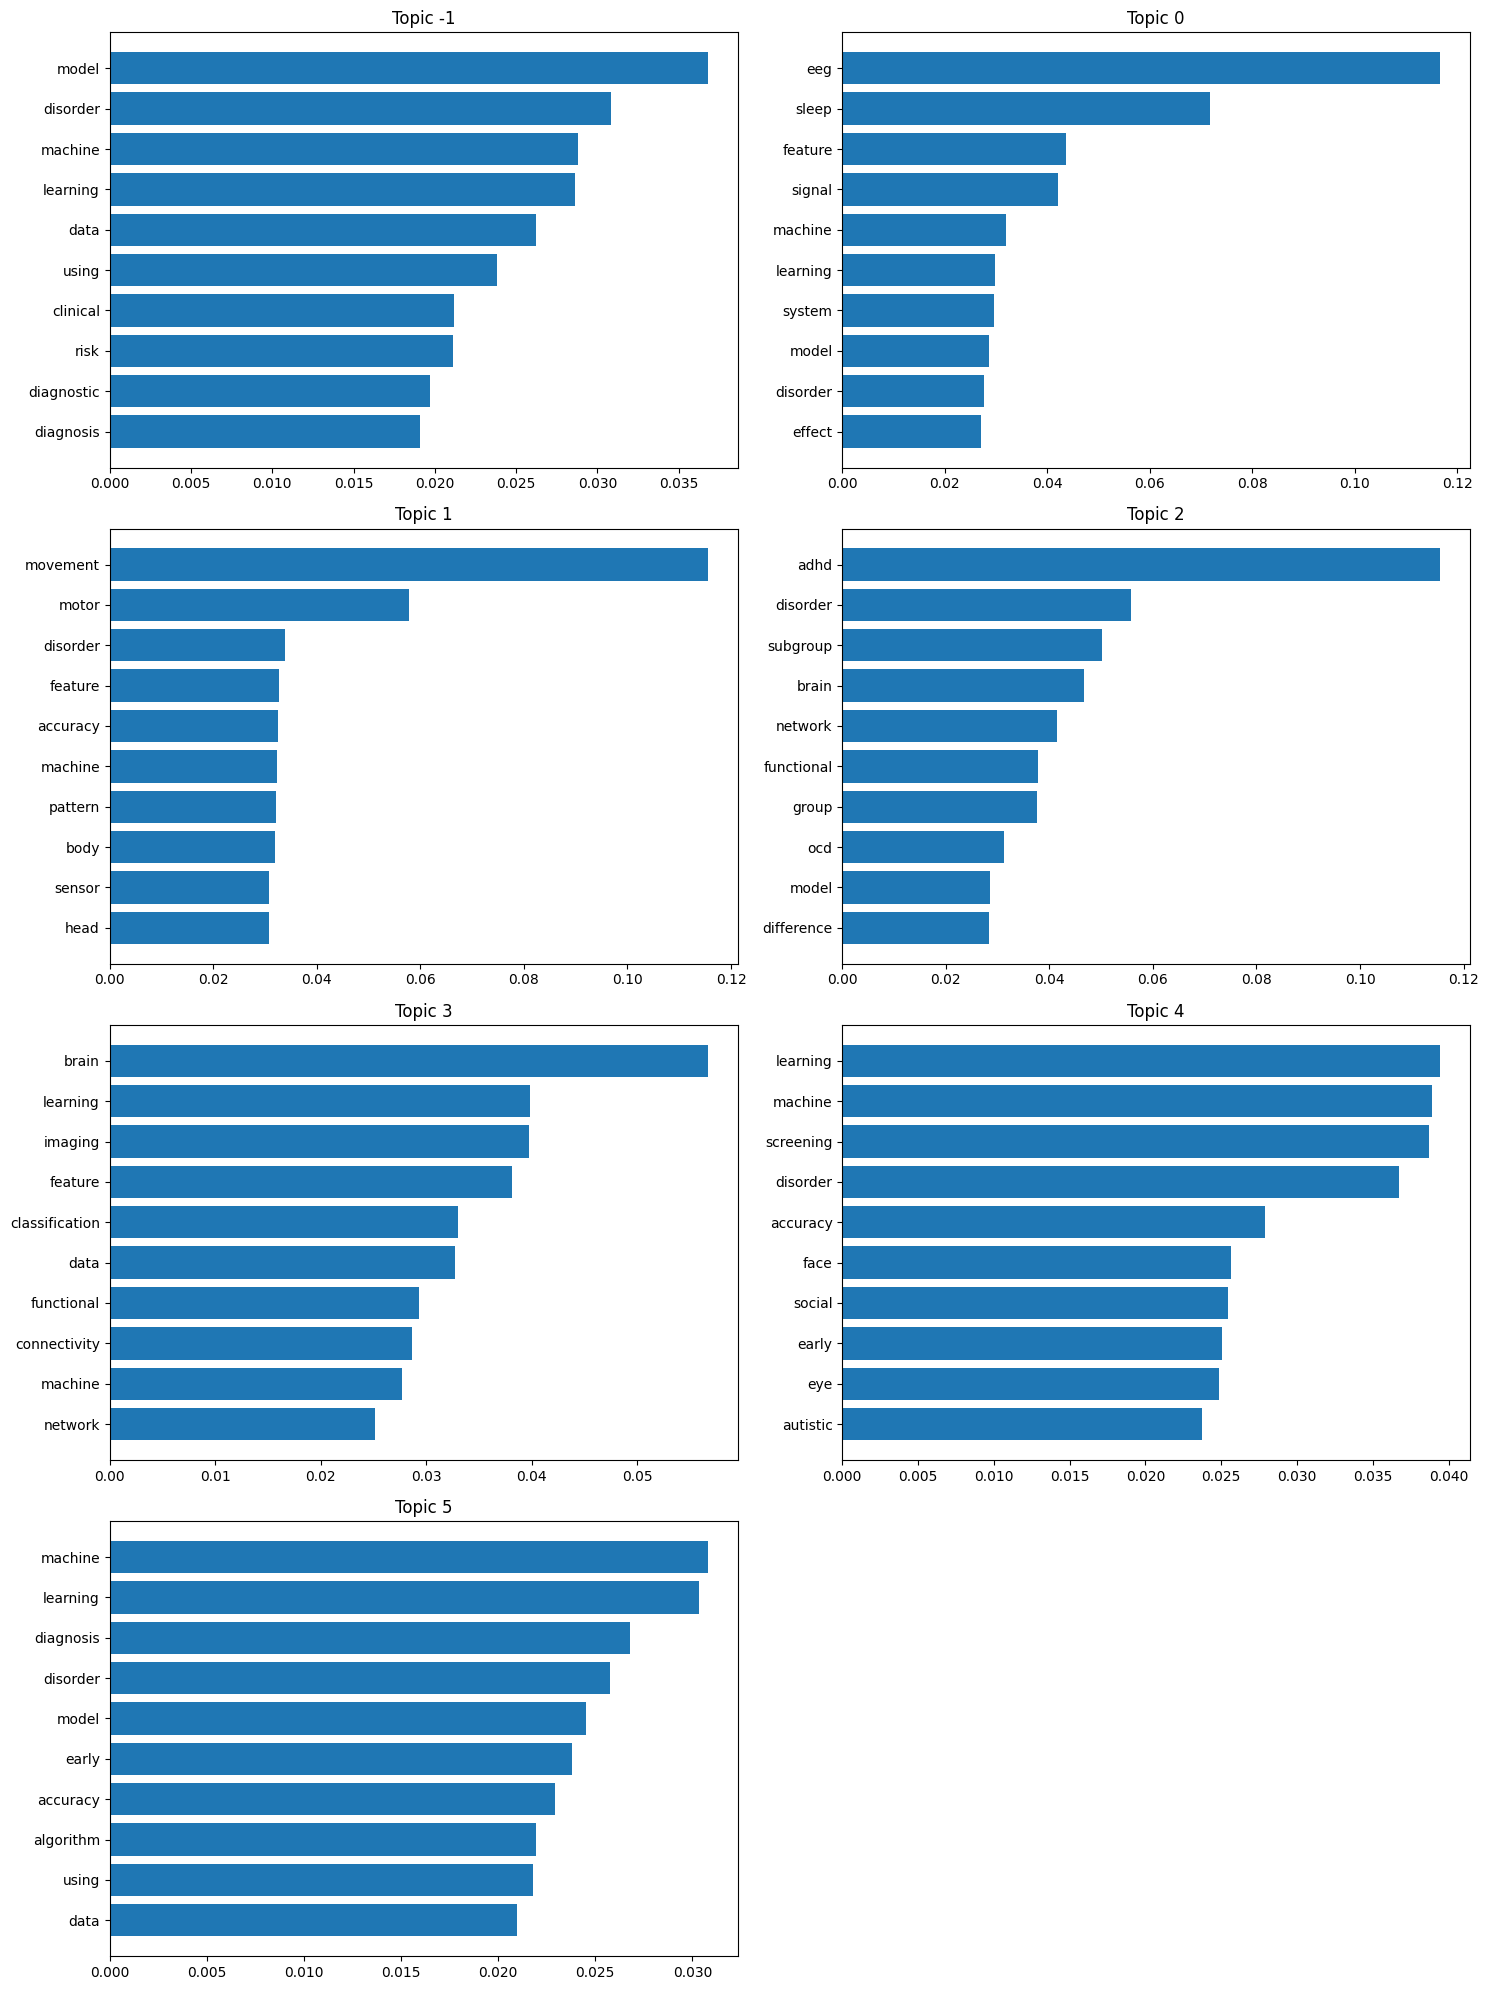

In [257]:
import numpy as np
import matplotlib.pyplot as plt




# Ottieni l'elenco dei topic univoci
unique_topics = topic_info_pd['Topic'].unique()

# Calcola il numero di righe necessarie per i subplot
nrows = int(np.ceil(len(unique_topics) / 2))

# Crea una figura e un array di assi
fig, axs = plt.subplots(nrows, 2, figsize=(15, nrows*5))

# Piatto l'array degli assi se c'è solo una riga
if nrows == 1:
    axs = axs.flatten()

# Loop sui topic univoci
for idx, topic in enumerate(unique_topics):

    # Ottenere le parole e i punteggi per il topic
    topic_words = topic_model.get_topic(topic)[:10]
    words = [word for word, _ in topic_words]
    scores = [score for _, score in topic_words]

    # Calcola gli indici delle righe e delle colonne per gli assi
    row_idx = idx // 2
    col_idx = idx % 2

    # Creare il grafico a barre orizzontali
    axs[row_idx, col_idx].barh(words, scores)
    axs[row_idx, col_idx].set_title(f'Topic {topic}')
    axs[row_idx, col_idx].invert_yaxis()

# Rimuovi gli assi vuoti se il numero di subplot è dispari
if len(unique_topics) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Mostra il grafico
plt.tight_layout()
plt.show()